<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/fundamentals_bancos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 5.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0e3bdd376fadf38771b2f26b8a286ce29dc97ed3253c35493217400aedd2ff1e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web

In [4]:
tickers = ('ITUB4.SA','SANB11.SA','BBDC4.SA', 'BBAS3.SA')

In [7]:
bancos = yf.download(tickers, start = "2010-01-01")["Adj Close"]
bancos.tail()

[*********************100%***********************]  4 of 4 completed


,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA
Date,,,,
2021-09-13,29.445259,21.370001,29.17,37.150002
2021-09-14,29.230000,21.230000,28.99,36.919998
2021-09-15,29.000000,21.040001,28.52,36.160000
2021-09-16,29.469999,20.770000,28.50,36.509998
2021-09-17,28.940001,20.020000,27.82,35.700001


In [11]:
infos = []
for i in bancos:
  infos.append(yf.Ticker(i).info)

In [18]:
fundamentals = ['beta', 'forwardPE','trailingPE','dividendYield']

In [13]:
df = pd.DataFrame(infos)

In [14]:
df = df.set_index('symbol')

In [15]:
df

,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,address2,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,recommendationKey,grossProfits,freeCashflow,targetMedianPrice,currentPrice,earningsGrowth,currentRatio,returnOnAssets,numberOfAnalystOpinions,targetMeanPrice,debtToEquity,returnOnEquity,targetHighPrice,totalCash,totalDebt,totalRevenue,totalCashPerShare,financialCurrency,revenuePerShare,...,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,algorithm,dividendRate,exDividendDate,circulatingSupply,startDate,regularMarketDayLow,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url,zip
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BBAS3.SA,Financial Services,85518,Banco do Brasil S.A. provides banking products...,BrasÃ­lia,55 80 0729 5285,DF,Brazil,[],http://www.bb.com.br,1,Banco do Brasil Building,Banks—Regional,"Quadra 5, Lote B Sector of Municipalities Nort...",0,0.23062,0,-52131131392,0.333,0.32716,None,None,none,57746081000,None,None,28.94,0.762,None,0.00984,None,None,None,0.13473,None,81610129408,830384242688,69523120128,28.601,BRL,24.366,...,13094128,29.47,30.013144,1.925,0,None,13094128,None,None,2.01,1631577600,None,None,0,BRL,5.199425,0,None,None,None,82577399808,None,None,11565648,0,28.97,0,0,40.56,None,3.41,0,28.83,False,0.0694,0,0,28.94,https://logo.clearbit.com/bb.com.br,NaN
BBDC4.SA,Financial Services,87362,"Banco Bradesco S.A., together with its subsidi...",Osasco,55 11 3684 4011,SP,Brazil,[],http://banco.bradesco,1,"Cidade De Deus, S/N",Banks—Regional,Vila Yara,0,0.23076,0,-116749123584,0.613,0.40187,None,None,none,61284269000,None,None,20.02,0.705,None,0.01355,None,None,None,0.15037,None,406315008000,491950899200,91330633728,41.846,BRL,9.397,...,50941942,20.77,22.640858,1.002,0,None,50941942,None,None,1.14,1633305600,None,None,0,BRL,9.230061,0,None,None,None,180730347520,None,None,37535928,0,20.20,0,0,28.83,None,2.50,0,19.93,False,0.0568,0,0,20.02,https://logo.clearbit.com/banco.bradesco,06029-900
ITUB4.SA,Financial Services,98300,ItaÃº Unibanco Holding S.A. provides a range o...,SÃ£o Paulo,55 11 5019 1267,SP,Brazil,[],http://www.itau.com.br,1,PraCa Alfredo Egydio de Souza Aranha,Banks—Regional,"100,Torre Olavo Setubal Parque Jabaquara",0,0.25373,0,-64917000192,0.744,0.42730,None,None,none,74219000000,None,None,27.82,3.869,None,0.01444,None,None,None,0.19000,None,353521008640,587949015040,109571997696,36.148,BRL,11.217,...,37630185,28.50,30.048000,0.461,0,None,37630185,None,None,0.70,1633046400,None,None,0,BRL,9.819979,0,None,None,None,262358171648,None,None,32569795,0,28.08,0,0,34.34,None,2.84,0,27.57,False,0.0252,0,0,27.82,https://logo.clearbit.com/itau.com.br,04344-902
SANB11.SA,Financial Services,46426,Banco Santander (Brasil) S.A. provides various...,SÃ£o Paulo,55 11 3553 3300,SP,Brazil,[],http://www.santander.com.br,1,Av. Pres Juscelino Kubitschek,Banks—Regional,2041 & 2235 Building A Vila OlÃ­mpia,0,0.29531,0,15669301248,1.901,0.63791,None,None,none,36062635000,None,None,35.83,0.946,None,0.01740,None,None,None,0.15029,None,122016038912,248268554240,52694839296,16.341,BRL,7.055,...,2218028,36.51,39.625000,1.270,0,None,2218028,None,None,3.65,1628121600,None,None,0,BRL,17.201153,0,None,None,None,138385489920,None,None,2303204,0,36.63,0,0,47.20,None,5.23,0,35.70,False,0.0999,0,0,35.83,https://logo.clearbit.com/santander.com.br,04543-011


In [19]:
df[df.columns[df.columns.isin(fundamentals)]]

,beta,forwardPE,trailingPE,dividendYield
symbol,,,,
BBAS3.SA,0.902646,5.205036,5.199425,0.0694
BBDC4.SA,1.173171,5.576602,9.230061,0.0568
ITUB4.SA,0.981157,9.211921,9.819979,0.0252
SANB11.SA,0.916105,10.036415,17.201153,0.0999


Text(0.5, 1.0, 'Dividend Yield')

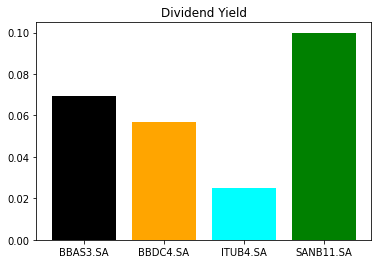

In [23]:
plt.bar(df.index, df.dividendYield, color=('k','orange','cyan','green'))
plt.title('Dividend Yield')